In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
2. **mejor-caso-BT-O**: Inancias de mejor caso para el algoritmo de BT con poda de optimalidad.
3. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
4. **bajo-contagio**: Son instancias con n = 1..350 y con densidad baja de contagio. Significa que se van a sumar varios beneficios antes de poder alcanzar el limite de contagio
5. **dinamica**: Instancias con n y M variando para probar el algoritmo de PD.
6. **alto-contagio**: Son instancias con n = 1..100 y con densidad alta de contagio, es decir, cada $c_i$ es más alto en comparación con $b_i$

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-O**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [4]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,alto_contagio,0,3,FB,0.003536
1,alto_contagio,1,0,FB,0.002535
2,alto_contagio,2,1,FB,0.003978
3,alto_contagio,3,6,FB,0.002485
4,alto_contagio,4,7,FB,0.004148


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

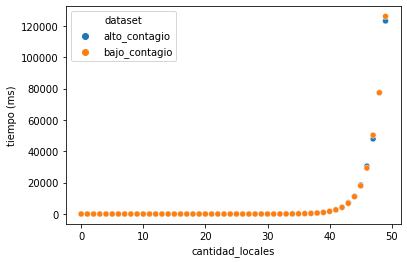

In [26]:
# Graficamos los tiempos de ejecución de cada dataset en función de la cantidad de locales.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo', hue='dataset');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

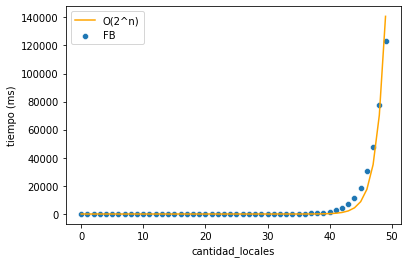

In [60]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="alto_contagio")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** (df_complejidad_FB["cantidad_locales"]) * 0.00000000025; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.9834242007685584


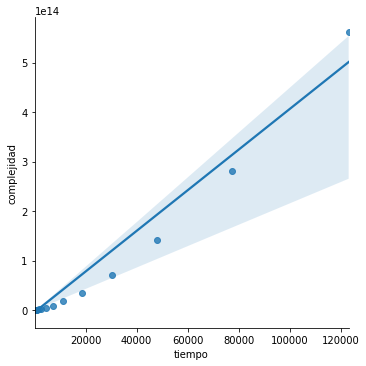

In [27]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="alto_contagio")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["cantidad_locales"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt, mejor-caso-bt-o y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso,  y lineal en el mejor caso.

In [61]:
df_resultados = pd.read_csv("resultados/resultado2.csv");
df_resultados.head()

,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,mejor-caso-BT,0,1000,BT,0.002565
1,mejor-caso-BT,1,1000,BT,0.002314
2,mejor-caso-BT,2,1000,BT,0.002565
3,mejor-caso-BT,3,1000,BT,0.003056
4,mejor-caso-BT,4,1000,BT,0.002024


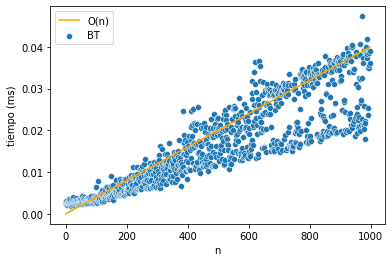

In [69]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["cantidad_locales"] * 0.00004; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.8838601544267558


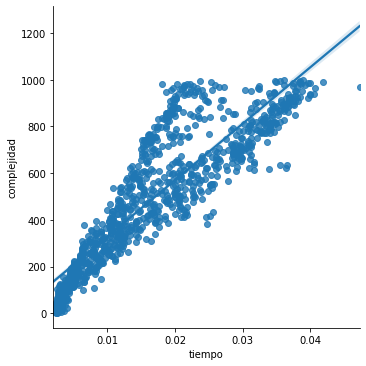

In [70]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["cantidad_locales"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

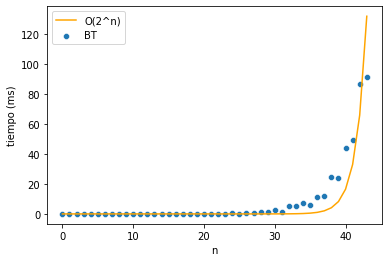

In [75]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["cantidad_locales"] * 0.000000000015; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='cantidad_locales', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='cantidad_locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.906987674257294


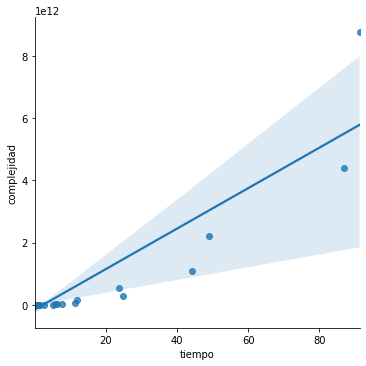

In [76]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["cantidad_locales"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

In [77]:
df_resultados = pd.read_csv("resultados/resultado3.csv");
df_resultados.head()

,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,mejor-caso-BT,0,1000,BT,0.002294
1,mejor-caso-BT,0,1000,BT-F,0.002244
2,mejor-caso-BT,0,1000,BT-O,0.002515
3,mejor-caso-BT,1,1000,BT,0.002825
4,mejor-caso-BT,1,1000,BT-F,0.002966


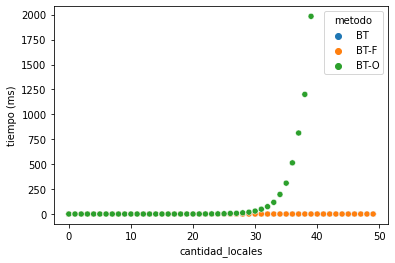

In [90]:
#contrastamos el algoritmo con cada poda
df_BT_mejor_caso = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso = df_BT_mejor_caso[df_BT_mejor_caso["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

In [ ]:
#contrastamos todos los métodos sobre el mejor caso que aprovecha optimalidad
df_BT_mejor_caso_con_optimalidad = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "mejor-caso-BT-O")].copy();
df_BT_mejor_caso_con_optimalidad = df_BT_mejor_caso_con_optimalidad[df_BT_mejor_caso_con_optimalidad["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_mejor_caso, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

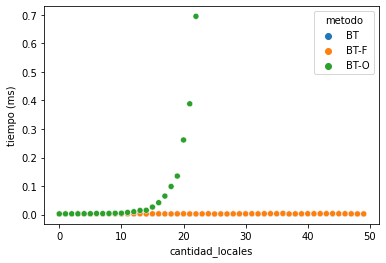

In [91]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_mejor_caso[df_BT_mejor_caso["tiempo"]<1], x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

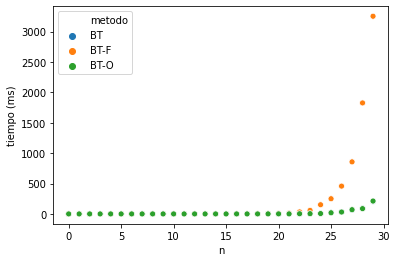

In [13]:
df_BT_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "densidad-baja")].copy();
fig = sns.scatterplot(data=df_BT_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

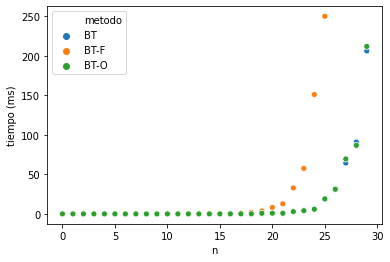

In [14]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_baja[df_BT_densidad_baja["tiempo"]<400], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

In [92]:
df_resultados = pd.read_csv("resultados/resultado4.csv");
df_resultados.head()

,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,variacion_n_m,100,100,DP,0.135022
1,variacion_n_m,100,150,DP,0.200424
2,variacion_n_m,100,200,DP,0.264204
3,variacion_n_m,100,250,DP,0.324998
4,variacion_n_m,100,300,DP,0.403074


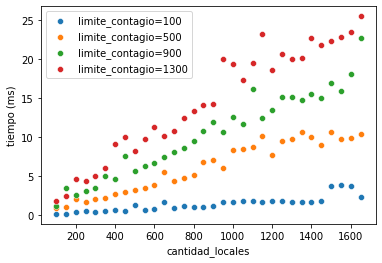

In [95]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==100], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==500], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==900], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==1300], x='cantidad_locales', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["limite_contagio"]==1700], x='cantidad_locales', y='tiempo');
fig.legend(labels=['limite_contagio=100','limite_contagio=500','limite_contagio=900','limite_contagio=1300','limite_contagio=1700']);
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

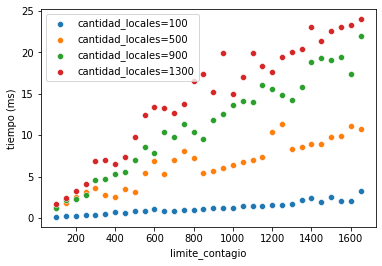

In [96]:
# Graficamos la evolución del tiempo de ejecución en función del limite de contagio, con cortes en distintas cantidad de locales.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==100], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==500], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==900], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==1300], x='limite_contagio', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["cantidad_locales"]==1700], x='limite_contagio', y='tiempo');
fig.legend(labels=['cantidad_locales=100','cantidad_locales=500','cantidad_locales=900','cantidad_locales=1300','cantidad_locales=1700']);
fig.set(xlabel='limite_contagio', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

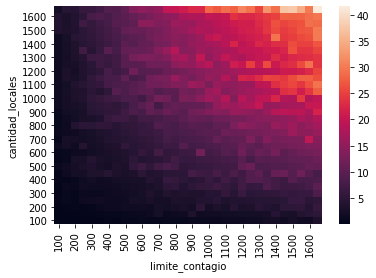

In [97]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por cantidad de locales y limite de contagio.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
df_heatmap = df_dinamica.pivot_table(index='cantidad_locales', columns='limite_contagio', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9800307493068907


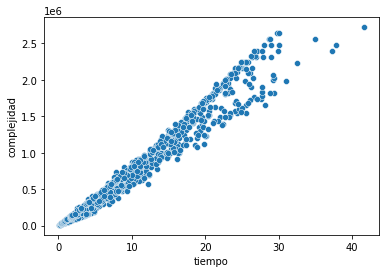

In [98]:
# Graficamos los tiempos de ejecución de la serie de instancias L1, ..., Ln vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="variacion_n_m")].copy();
df_dinamica["complejidad"] = df_dinamica["cantidad_locales"] * df_dinamica["limite_contagio"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtracking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets alto_contagio y bajo_contagio.

In [99]:
df_resultados = pd.read_csv("resultados/resultado5.csv");
df_resultados.head()

,dataset,cantidad_locales,limite_contagio,metodo,tiempo
0,bajo_contagio,1,1,DP,0.002855
1,bajo_contagio,2,1,DP,0.002845
2,bajo_contagio,3,1,DP,0.003356
3,bajo_contagio,4,1,DP,0.003236
4,bajo_contagio,5,1,DP,0.003286


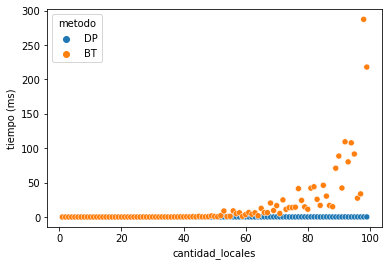

In [100]:
df_alto_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "alto_contagio")].copy();
fig = sns.scatterplot(data=df_alto_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alto.svg");

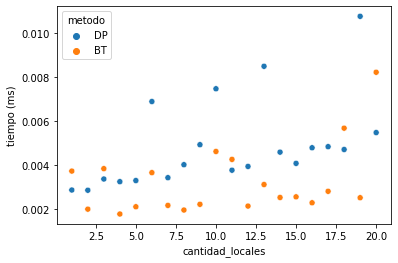

In [105]:
df_bajo_contagio = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "bajo_contagio")].copy();
df_bajo_contagio = df_bajo_contagio[df_bajo_contagio["cantidad_locales"]<=20];
fig = sns.scatterplot(data=df_bajo_contagio, x='cantidad_locales', y='tiempo', hue='metodo');
fig.set(xlabel='cantidad_locales', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");